In [1]:
%pip install wfdb numpy pandas matplotlib tensorflow imbalanced-learn keras-tuner matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 50.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 25.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.4 M

In [2]:
import os
import numpy as np
import pandas as pd

file = './physionet2017.csv'

data = pd.read_csv(file)

data


,0,1,2,3,4,5,6,7,8,9,...,1992,1993,1994,1995,1996,1997,1998,1999,name,label
0,0.035032,0.037155,0.044586,0.063694,0.076433,0.085987,0.089172,0.083864,0.072187,0.061571,...,0.008493,0.000000,-0.007431,-0.012739,-0.015924,-0.019108,-0.023355,-0.022293,A00/A00001,0
1,-0.035288,-0.032573,-0.030945,-0.029859,-0.031488,-0.034202,-0.037459,-0.040717,-0.043974,-0.047231,...,-0.001629,-0.001086,-0.000543,-0.000543,0.000000,0.000000,0.000543,0.001086,A00/A00002,0
2,-0.303922,-0.261438,-0.222222,-0.192810,-0.176471,-0.163399,-0.147059,-0.130719,-0.117647,-0.107843,...,-0.346405,-0.339869,-0.323529,-0.297386,-0.264706,-0.209150,-0.117647,-0.065359,A00/A00003,0
3,0.109467,0.117604,0.128698,0.142012,0.153107,0.161982,0.170118,0.176036,0.181213,0.184911,...,0.780325,0.640533,0.467456,0.298077,0.165680,0.085799,0.012574,0.013314,A00/A00004,1
4,-0.019856,-0.017148,-0.014440,-0.011733,-0.009928,-0.008123,-0.006318,-0.004513,-0.003610,-0.001805,...,-0.306859,-0.260830,-0.214801,-0.168773,-0.124549,-0.083935,-0.051444,0.000000,A00/A00005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,0.151235,0.148148,0.145062,0.145062,0.141975,0.138889,0.135802,0.132716,0.129630,0.126543,...,0.182099,0.179012,0.172840,0.166667,0.160494,0.151235,0.138889,0.108025,A08/A08524,0
8524,0.502273,0.518182,0.536364,0.556818,0.572727,0.588636,0.602273,0.615909,0.631818,0.654545,...,-0.309091,-0.311364,-0.309091,-0.288636,-0.261364,-0.218182,-0.175000,-0.134091,A08/A08525,2
8525,-0.124053,-0.113636,-0.107955,-0.105114,-0.101326,-0.096591,-0.092803,-0.096591,-0.103220,-0.107955,...,-0.407197,-0.509470,-0.541667,-0.511364,-0.426136,-0.296402,-0.163826,-0.049242,A08/A08526,0
8526,-0.248731,-0.253807,-0.260575,-0.267343,-0.272420,-0.277496,-0.282572,-0.285956,-0.287648,-0.285956,...,-0.126904,-0.120135,-0.115059,-0.109983,-0.101523,-0.091371,-0.074450,-0.060914,A08/A08527,0


physionet challenge 2017:
8528 different recordings, each one has 2002 vals.
0,1,2,3 classifications.
- 0 = normal
- 1 = AF
- 2 = other
- 3 = noisy

In [3]:
classes = np.unique(data.label)
print(classes)



[0 1 2 3]


In [4]:
data = data.drop("name", axis='columns')
data

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,label
0,0.035032,0.037155,0.044586,0.063694,0.076433,0.085987,0.089172,0.083864,0.072187,0.061571,...,0.020170,0.008493,0.000000,-0.007431,-0.012739,-0.015924,-0.019108,-0.023355,-0.022293,0
1,-0.035288,-0.032573,-0.030945,-0.029859,-0.031488,-0.034202,-0.037459,-0.040717,-0.043974,-0.047231,...,-0.002714,-0.001629,-0.001086,-0.000543,-0.000543,0.000000,0.000000,0.000543,0.001086,0
2,-0.303922,-0.261438,-0.222222,-0.192810,-0.176471,-0.163399,-0.147059,-0.130719,-0.117647,-0.107843,...,-0.339869,-0.346405,-0.339869,-0.323529,-0.297386,-0.264706,-0.209150,-0.117647,-0.065359,0
3,0.109467,0.117604,0.128698,0.142012,0.153107,0.161982,0.170118,0.176036,0.181213,0.184911,...,0.846154,0.780325,0.640533,0.467456,0.298077,0.165680,0.085799,0.012574,0.013314,1
4,-0.019856,-0.017148,-0.014440,-0.011733,-0.009928,-0.008123,-0.006318,-0.004513,-0.003610,-0.001805,...,-0.347473,-0.306859,-0.260830,-0.214801,-0.168773,-0.124549,-0.083935,-0.051444,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,0.151235,0.148148,0.145062,0.145062,0.141975,0.138889,0.135802,0.132716,0.129630,0.126543,...,0.188272,0.182099,0.179012,0.172840,0.166667,0.160494,0.151235,0.138889,0.108025,0
8524,0.502273,0.518182,0.536364,0.556818,0.572727,0.588636,0.602273,0.615909,0.631818,0.654545,...,-0.304545,-0.309091,-0.311364,-0.309091,-0.288636,-0.261364,-0.218182,-0.175000,-0.134091,2
8525,-0.124053,-0.113636,-0.107955,-0.105114,-0.101326,-0.096591,-0.092803,-0.096591,-0.103220,-0.107955,...,-0.255682,-0.407197,-0.509470,-0.541667,-0.511364,-0.426136,-0.296402,-0.163826,-0.049242,0
8526,-0.248731,-0.253807,-0.260575,-0.267343,-0.272420,-0.277496,-0.282572,-0.285956,-0.287648,-0.285956,...,-0.135364,-0.126904,-0.120135,-0.115059,-0.109983,-0.101523,-0.091371,-0.074450,-0.060914,0


In [8]:
labels = data["label"]
labels

from collections import Counter

# Assuming `labels` is your labels array
class_counts = Counter(labels)

# Print the frequency of each class
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} instances")


Class 0: 5076 instances
Class 1: 758 instances
Class 2: 2415 instances
Class 3: 279 instances


In [6]:
features = data.drop("label", axis='columns')
features

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.035032,0.037155,0.044586,0.063694,0.076433,0.085987,0.089172,0.083864,0.072187,0.061571,...,0.038217,0.020170,0.008493,0.000000,-0.007431,-0.012739,-0.015924,-0.019108,-0.023355,-0.022293
1,-0.035288,-0.032573,-0.030945,-0.029859,-0.031488,-0.034202,-0.037459,-0.040717,-0.043974,-0.047231,...,-0.003800,-0.002714,-0.001629,-0.001086,-0.000543,-0.000543,0.000000,0.000000,0.000543,0.001086
2,-0.303922,-0.261438,-0.222222,-0.192810,-0.176471,-0.163399,-0.147059,-0.130719,-0.117647,-0.107843,...,-0.330065,-0.339869,-0.346405,-0.339869,-0.323529,-0.297386,-0.264706,-0.209150,-0.117647,-0.065359
3,0.109467,0.117604,0.128698,0.142012,0.153107,0.161982,0.170118,0.176036,0.181213,0.184911,...,0.844675,0.846154,0.780325,0.640533,0.467456,0.298077,0.165680,0.085799,0.012574,0.013314
4,-0.019856,-0.017148,-0.014440,-0.011733,-0.009928,-0.008123,-0.006318,-0.004513,-0.003610,-0.001805,...,-0.381769,-0.347473,-0.306859,-0.260830,-0.214801,-0.168773,-0.124549,-0.083935,-0.051444,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,0.151235,0.148148,0.145062,0.145062,0.141975,0.138889,0.135802,0.132716,0.129630,0.126543,...,0.191358,0.188272,0.182099,0.179012,0.172840,0.166667,0.160494,0.151235,0.138889,0.108025
8524,0.502273,0.518182,0.536364,0.556818,0.572727,0.588636,0.602273,0.615909,0.631818,0.654545,...,-0.297727,-0.304545,-0.309091,-0.311364,-0.309091,-0.288636,-0.261364,-0.218182,-0.175000,-0.134091
8525,-0.124053,-0.113636,-0.107955,-0.105114,-0.101326,-0.096591,-0.092803,-0.096591,-0.103220,-0.107955,...,-0.057765,-0.255682,-0.407197,-0.509470,-0.541667,-0.511364,-0.426136,-0.296402,-0.163826,-0.049242
8526,-0.248731,-0.253807,-0.260575,-0.267343,-0.272420,-0.277496,-0.282572,-0.285956,-0.287648,-0.285956,...,-0.145516,-0.135364,-0.126904,-0.120135,-0.115059,-0.109983,-0.101523,-0.091371,-0.074450,-0.060914


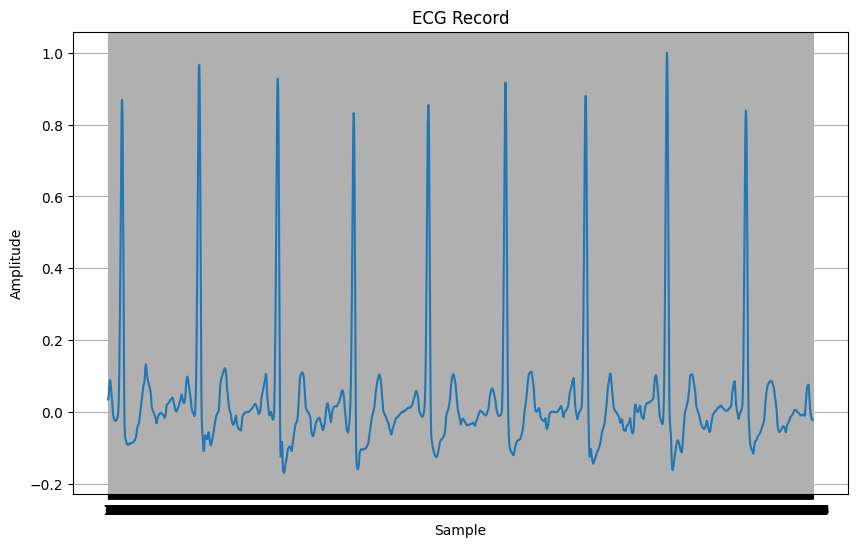

In [8]:
import matplotlib.pyplot as plt


ecg_record = features.iloc[0]

# Plot the ECG record
plt.figure(figsize=(10, 6))
plt.plot(ecg_record)
plt.title('ECG Record')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [9]:
from scipy.signal import medfilt

# Denoising function using median filter
def denoise_ecg(ecg_signal):
    # Apply median filter with kernel size 5
    denoised_signal = medfilt(ecg_signal, kernel_size=5)
    return denoised_signal

data_to_denoise = data.drop(columns=['label'])

# Loop through each row and denoise the selected columns
for index, row in data_to_denoise.iterrows():
    ecg_signal = row.values  # Get the ECG signal values
    denoised_signal = denoise_ecg(ecg_signal)  # Denoise the signal
    data_to_denoise.loc[index] = denoised_signal  # Replace the original signal with the denoised signal

# Concatenate the denoised data with the labels
denoised_data = pd.concat([data_to_denoise, data['label']], axis=1)


In [10]:
# Convert denoised data to DataFrame
denoised_df = pd.DataFrame(denoised_data, columns=data.columns)

denoised_df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,label
0,0.035032,0.037155,0.044586,0.063694,0.076433,0.083864,0.083864,0.083864,0.072187,0.061571,...,0.020170,0.008493,0.000000,-0.007431,-0.012739,-0.015924,-0.019108,-0.019108,-0.019108,0
1,-0.030945,-0.030945,-0.031488,-0.031488,-0.031488,-0.034202,-0.037459,-0.040717,-0.043974,-0.047231,...,-0.002714,-0.001629,-0.001086,-0.000543,-0.000543,0.000000,0.000000,0.000000,0.000000,0
2,-0.222222,-0.222222,-0.222222,-0.192810,-0.176471,-0.163399,-0.147059,-0.130719,-0.117647,-0.107843,...,-0.339869,-0.339869,-0.339869,-0.323529,-0.297386,-0.264706,-0.209150,-0.117647,-0.065359,0
3,0.109467,0.117604,0.128698,0.142012,0.153107,0.161982,0.170118,0.176036,0.181213,0.184911,...,0.780325,0.780325,0.640533,0.467456,0.298077,0.165680,0.085799,0.013314,0.012574,1
4,-0.014440,-0.014440,-0.014440,-0.011733,-0.009928,-0.008123,-0.006318,-0.004513,-0.003610,-0.001805,...,-0.347473,-0.306859,-0.260830,-0.214801,-0.168773,-0.124549,-0.083935,-0.051444,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,0.145062,0.145062,0.145062,0.145062,0.141975,0.138889,0.135802,0.132716,0.129630,0.126543,...,0.188272,0.182099,0.179012,0.172840,0.166667,0.160494,0.151235,0.138889,0.108025,0
8524,0.502273,0.518182,0.536364,0.556818,0.572727,0.588636,0.602273,0.615909,0.631818,0.654545,...,-0.304545,-0.309091,-0.309091,-0.309091,-0.288636,-0.261364,-0.218182,-0.175000,-0.134091,2
8525,-0.107955,-0.107955,-0.107955,-0.105114,-0.101326,-0.096591,-0.096591,-0.096591,-0.103220,-0.107955,...,-0.255682,-0.407197,-0.509470,-0.509470,-0.509470,-0.426136,-0.296402,-0.163826,-0.049242,0
8526,-0.248731,-0.253807,-0.260575,-0.267343,-0.272420,-0.277496,-0.282572,-0.285956,-0.285956,-0.285956,...,-0.135364,-0.126904,-0.120135,-0.115059,-0.109983,-0.101523,-0.091371,-0.074450,-0.060914,0


In [11]:
# Step 3: Balance the classes using data augmentation
# Calculate the maximum number of instances among all classes
max_class_count = data['label'].value_counts().max()

# Initialize lists to store augmented data
augmented_X = []
augmented_y = []

# Loop through each class
for label in data['label'].unique():
    class_data = denoised_df[data['label'] == label].values
    num_to_augment = max_class_count - len(class_data)
    if num_to_augment > 0:
        # Augment the data for the current class
        for _ in range(num_to_augment):
            # Generate augmented signal using random noise
            augmented_signal = class_data + np.random.normal(0, 0.1, class_data.shape)
            # Append augmented signal and corresponding label to lists
            augmented_X.append(augmented_signal)
            augmented_y.append(label)

# Convert lists to numpy arrays
augmented_X = np.array(augmented_X)
augmented_y = np.array(augmented_y)



In [ ]:
# Convert lists to arrays
augmented_X = np.array(augmented_X)
augmented_y = np.array(augmented_y)

# Step 4: Prepare the data for training
# Reshape augmented_X to match the expected input shape for the model
# (assuming the model expects a 3D array with dimensions [samples, time_steps, features])
augmented_X = augmented_X.reshape(-1, denoised_df.shape[1], denoised_df.shape[2])

In [23]:
ag = pd.DataFrame(augmented_y)
ag

,0
0,2
1,2
2,2
3,2
4,2
...,...
11037717,3
11037718,3
11037719,3
11037720,3


In [7]:
print(class_counts[label])

NameError: name 'label' is not defined

In [9]:
from sklearn.model_selection import train_test_split



X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
#X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_valid_cnn = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

#, kernel_regularizer=regularizers.l2(0.001)
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(2000,1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classes), activation='softmax'))  # softmax for multiclass classification

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
187/187 [==============================] - 8s 38ms/step - loss: 1.0488 - accuracy: 0.5844 - val_loss: 0.9962 - val_accuracy: 0.5927
Epoch 2/10
187/187 [==============================] - 7s 37ms/step - loss: 1.0039 - accuracy: 0.5906 - val_loss: 0.9952 - val_accuracy: 0.5927
Epoch 3/10
187/187 [==============================] - 7s 39ms/step - loss: 0.9637 - accuracy: 0.5924 - val_loss: 1.0303 - val_accuracy: 0.5919
Epoch 4/10
187/187 [==============================] - 7s 37ms/step - loss: 0.9290 - accuracy: 0.5979 - val_loss: 1.0218 - val_accuracy: 0.5817
Epoch 5/10
187/187 [==============================] - 7s 36ms/step - loss: 0.8894 - accuracy: 0.6117 - val_loss: 1.0400 - val_accuracy: 0.5715
Epoch 6/10
187/187 [==============================] - 7s 36ms/step - loss: 0.8508 - accuracy: 0.

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

model_LTSM = models.Sequential()

# Replace Conv1D layers with LSTM layers
model_LTSM.add(layers.LSTM(32, return_sequences=True, input_shape=(2000, 1)))  # LSTM layer with 32 units
model_LTSM.add(layers.MaxPooling1D(2))

model_LTSM.add(layers.LSTM(64))  # LSTM layer with 64 units
model_LTSM.add(layers.Dropout(0.5))

model_LTSM.add(layers.Dense(64, activation='relu'))
model_LTSM.add(layers.Dropout(0.5))

# Output layer remains the same
model_LTSM.add(layers.Dense(len(classes), activation='softmax'))  # softmax for multiclass classification

# Compile the model
model_LTSM.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_LTSM.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model_LTSM.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


2024-02-25 19:37:26.335736: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-25 19:37:26.379182: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-25 19:37:26.380376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-25 19:37:27.496472: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-02-25 19:37:40.824195: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/10
187/187 [==============================] - 144s 755ms/step - loss: 1.0687 - accuracy: 0.5731 - val_loss: 1.0247 - val_accuracy: 0.5927
Epoch 2/10
187/187 [==============================] - 139s 745ms/step - loss: 1.0263 - accuracy: 0.5902 - val_loss: 1.0129 - val_accuracy: 0.5927
Epoch 3/10
187/187 [==============================] - 139s 741ms/step - loss: 1.0192 - accuracy: 0.5900 - val_loss: 1.0110 - val_accuracy: 0.5927
Epoch 4/10
187/187 [==============================] - 139s 743ms/step - loss: 1.0130 - accuracy: 0.5904 - val_loss: 1.0090 - val_accuracy: 0.5927
Epoch 5/10
187/187 [==============================] - 139s 745ms/step - loss: 1.0146 - accuracy: 0.5904 - val_loss: 1.0109 - val_accuracy: 0.5927
Epoch 6/10
187/187 [==============================] - 139s 744ms/step - loss: 

In [12]:

%pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


187/187 [==============================] - 1s 7ms/step


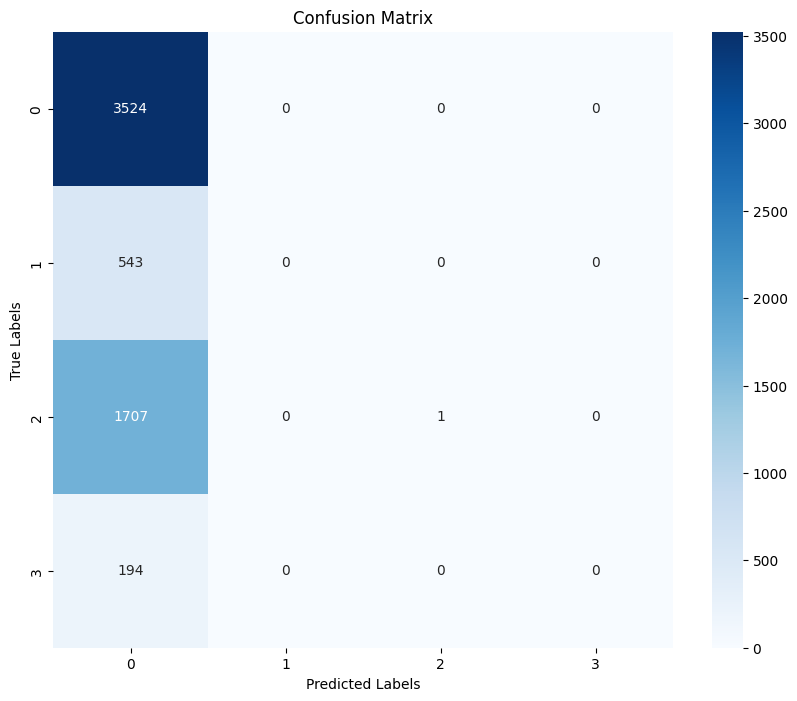

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use the trained model to make predictions on the validation data
y_pred = model.predict(X_train)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report


print("Classification Report:")
print(classification_report(y_valid, y_pred_classes))

Classification Report:


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets